## Interact with the Graphical Maps By Hovering Your Mouse Over a Point to Highlight Data
## Tables Describe Each of the Data Points in Detail

In [1]:
from traitlets.config import Config
import nbformat as nbf
from nbconvert.exporters import HTMLExporter
from nbconvert.preprocessors import TagRemovePreprocessor

# Setup config
c = Config()

# Configure tag removal - be sure to tag your cells to remove  using the
# words remove_cell to remove cells. You can also modify the code to use
# a different tag word
c.TagRemovePreprocessor.remove_cell_tags = ("remove_cell",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ('remove_output',)
c.TagRemovePreprocessor.remove_input_tags = ('remove_input',)
c.TagRemovePreprocessor.enabled = True

# Configure and run out exporter
c.HTMLExporter.preprocessors = ["nbconvert.preprocessors.TagRemovePreprocessor"]

exporter = HTMLExporter(config=c)
exporter.register_preprocessor(TagRemovePreprocessor(config=c),True)

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geojson
import geojson

print('Libraries imported.')
!pip install folium 
!pip install nbinteract


Libraries imported.
     |████████████████████████████████| 94 kB 8.1 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 125 kB 64.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 10.4 MB/s eta 0:00:01
INFO: pip is looking at multiple versions of mistune to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of entrypoints to determine which version is compatible with other requirements. This could take a while.


INFO: pip is looking at multiple versions of mistune to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. If you want to abort this run, you can press Ctrl + C to do so. To improve how pip performs, tell us what happened here: https://pip.pypa.io/surveys/backtracking
INFO: pip is looking at multiple versions of nbconvert to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 553 kB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 551 kB 52.2 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 52.4 MB/s eta 0:00:01
INFO: pip is looking at multiple versions of entrypoints to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 551 kB 53.7 MB/s e

In [3]:
import nbinteract as nbi

In [4]:
# Lets get the coordinate points for Atlanta
address = 'Florida'

geolocator = Nominatim(user_agent="flo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Florida are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Florida are 27.7567667, -81.4639835.


In [5]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 64.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 63.4 MB/s eta 0:00:01


In [6]:
import geopandas

In [7]:
url = "https://raw.githubusercontent.com/danielcs88/fl_geo_json/master/geojson-fl-counties-fips.json"
df = geopandas.read_file(url)

In [8]:
df

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021..."
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ..."
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682..."
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448..."
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820..."
5,12125,0500000US12125,12,125,Union,County,243.556,"POLYGON ((-82.41873 29.92309, -82.52971 29.940..."
6,12001,0500000US12001,12,001,Alachua,County,875.020,"POLYGON ((-82.55651 29.51198, -82.65630 29.564..."
7,12013,0500000US12013,12,013,Calhoun,County,567.334,"POLYGON ((-85.38968 30.20097, -85.38395 30.566..."
8,12023,0500000US12023,12,023,Columbia,County,797.574,"POLYGON ((-82.58400 30.59180, -82.56924 30.590..."
9,12039,0500000US12039,12,039,Gadsden,County,516.332,"POLYGON ((-84.86469 30.71154, -84.86347 30.711..."


In [28]:
gdf = geopandas.GeoDataFrame(df, crs="EPSG:4326")

In [29]:
newgdf = gdf.to_json()

In [30]:
import folium # map rendering library

In [31]:
florida_geo = r'fl-state.json' # geojson file

# create a plain atlanta map
florida_map = folium.Map(location=[latitude, longitude], zoom_start=7)

## A cholopleth map of Florida showing the boundaries between each of the major cities.

In [36]:
# generate choropleth map using florida GeoJson Data
florida_map.choropleth(
    geo_data=newgdf,
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.4,
    reset=True
)

# display map
florida_map

In [35]:
xgdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.id,
                             df.id))

In [36]:
county = xgdf["NAME"]
county

0           Marion
1           Monroe
2           Orange
3        St. Lucie
4           Sumter
5            Union
6          Alachua
7          Calhoun
8         Columbia
9          Gadsden
10       Highlands
11          Holmes
12            Leon
13          Nassau
14        Okaloosa
15         Osceola
16      Palm Beach
17           Pasco
18          Putnam
19       St. Johns
20      Santa Rosa
21        Sarasota
22        Seminole
23         Volusia
24          Walton
25           Baker
26             Bay
27         Broward
28       Charlotte
29             Lee
30         Madison
31         Manatee
32          Citrus
33           Dixie
34           Duval
35       Gilchrist
36          Glades
37            Gulf
38          Hardee
39          Hendry
40        Hernando
41    Indian River
42         Jackson
43            Lake
44         Wakulla
45          Martin
46      Okeechobee
47            Polk
48        Suwannee
49      Washington
50        Bradford
51            Clay
52          

In [37]:
lat_list = []
long_list = []
state_list = []
for i in county:
    address = i, 'FL'
    geolocator = Nominatim(user_agent="flo_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat_list.append(latitude)
    long_list.append(longitude)
    state_list.append('Florida')
    

In [38]:
state = pd.DataFrame(state_list)
cities = pd.DataFrame(county)
latitudes = pd.DataFrame(lat_list)
longitudes = pd.DataFrame(long_list)

flor_data = pd.concat([state, cities, latitudes, longitudes], axis = 1)
flor_data.columns = ['State', 'City', 'Latitude', 'Longitude']
flor_data

,State,City,Latitude,Longitude
0,Florida,Marion,29.218245,-82.062695
1,Florida,Monroe,25.040513,-80.833716
2,Florida,Orange,28.495156,-81.311166
3,Florida,St. Lucie,27.390090,-80.457904
4,Florida,Sumter,28.668975,-82.076402
5,Florida,Union,30.044304,-82.395448
6,Florida,Alachua,29.675568,-82.364011
7,Florida,Calhoun,30.385373,-85.222352
8,Florida,Columbia,30.209523,-82.626370
9,Florida,Gadsden,30.593735,-84.638994


We will now use API calls from NSRDB (National Solar Radiation Database ) to obtain data for our Machine Learning Model https://nsrdb.nrel.gov/data-sets/api-instructions.html

In [39]:
import sys, os
from IPython.display import display


In [40]:
url = "https://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}".format(year=2019, lat=25.040513, lon=-80.833716, leap='false', interval=60, utc='true', name='DamianOhienmhen', email='dohmhen@gmail.com', mailing_list='false', affiliation='Nugenesis', reason='hackathon', api='RXSAmh30ugEyJuJYJCaTGkOpiNCmfB0SGJmpEwMy', attr='ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle' , skiprows=2)

In [41]:
#energy = pd.read_csv(url,nrows = 10)
energy = pd.read_csv(url)

In [42]:
#energy = df.set_index(pd.date_range('1/1/{yr}'.format(yr=2020), freq="interval+'Min'", periods=525600/int(7844)))

In [69]:
energy.head(100)
remove_cell

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,Clearsky DHI Units,Clearsky DNI Units,Clearsky GHI Units,Dew Point Units,DHI Units,DNI Units,GHI Units,Solar Zenith Angle Units,Temperature Units,Pressure Units,Relative Humidity Units,Precipitable Water Units,Wind Direction Units,Wind Speed,Cloud Type -15,Cloud Type 0,Cloud Type 1,Cloud Type 2,Cloud Type 3,Cloud Type 4,Cloud Type 5,Cloud Type 6,Cloud Type 7,Cloud Type 8,Cloud Type 9,Cloud Type 10,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
2,2019,1,1,0,30,0,0,0,4.800000000000001,24.8,113.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,1,30,0,0,0,4.7,24.700000000000003,126.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,2,30,0,0,0,4.7,24.6,139.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,1,1,3,30,0,0,0,4.7,24.6,153.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019,1,1,4,30,0,0,0,4.6000000000000005,24.6,166.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,1,1,5,30,0,0,0,4.6000000000000005,24.6,177.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,1,1,6,30,0,0,0,4.4,24.6,165.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019,1,1,7,30,0,0,0,4.2,24.700000000000003,151.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2019,1,1,8,30,0,0,0,4.1000000000000005,24.700000000000003,138.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2019,1,1,9,30,0,0,0,4.1000000000000005,24.6,124.88000000000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
energy.drop(energy.index[0:2], inplace = True)
energy.head()

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,Clearsky DHI Units,Clearsky DNI Units,Clearsky GHI Units,Dew Point Units,DHI Units,DNI Units,GHI Units,Solar Zenith Angle Units,Temperature Units,Pressure Units,Relative Humidity Units,Precipitable Water Units,Wind Direction Units,Wind Speed,Cloud Type -15,Cloud Type 0,Cloud Type 1,Cloud Type 2,Cloud Type 3,Cloud Type 4,Cloud Type 5,Cloud Type 6,Cloud Type 7,Cloud Type 8,Cloud Type 9,Cloud Type 10,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
4,2019,1,1,2,30,0,0,0,4.7,24.6,139.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,1,1,3,30,0,0,0,4.7,24.6,153.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019,1,1,4,30,0,0,0,4.6000000000000005,24.6,166.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,1,1,5,30,0,0,0,4.6000000000000005,24.6,177.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,1,1,6,30,0,0,0,4.4,24.6,165.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
energy.shape

(8758, 46)

In [72]:
GHIdflat = energy['Latitude']
GHIdflong = energy['Longitude']

In [73]:
GHIdflat.head()

4    0
5    0
6    0
7    0
8    0
Name: Latitude, dtype: object

In [74]:
GHIdflat = GHIdflat.apply(pd.to_numeric)

In [75]:
meanghi = GHIdflat.mean()

In [76]:
GHIdflong = GHIdflong.apply(pd.to_numeric)

In [77]:
meanws = GHIdflong.mean()

In [78]:
data = [[meanghi, meanws]]
avgdf = pd.DataFrame(data, columns = ['GHI', 'Wind Speed'])
avgdf

,GHI,Wind Speed
0,228.103448,70.269925


In [79]:
energy.columns.values

array(['Source', 'Location ID', 'City', 'State', 'Country', 'Latitude',
       'Longitude', 'Time Zone', 'Elevation', 'Local Time Zone',
       'Clearsky DHI Units', 'Clearsky DNI Units', 'Clearsky GHI Units',
       'Dew Point Units', 'DHI Units', 'DNI Units', 'GHI Units',
       'Solar Zenith Angle Units', 'Temperature Units', 'Pressure Units',
       'Relative Humidity Units', 'Precipitable Water Units',
       'Wind Direction Units', 'Wind Speed', 'Cloud Type -15',
       'Cloud Type 0', 'Cloud Type 1', 'Cloud Type 2', 'Cloud Type 3',
       'Cloud Type 4', 'Cloud Type 5', 'Cloud Type 6', 'Cloud Type 7',
       'Cloud Type 8', 'Cloud Type 9', 'Cloud Type 10', 'Cloud Type 11',
       'Cloud Type 12', 'Fill Flag 0', 'Fill Flag 1', 'Fill Flag 2',
       'Fill Flag 3', 'Fill Flag 4', 'Fill Flag 5',
       'Surface Albedo Units', 'Version'], dtype=object)

In [80]:
sampledf = energy[['Source', 'Latitude',
       'Longitude', 'Time Zone', 'Elevation', 'Local Time Zone']]

In [81]:
sampledf.head()

,Source,Latitude,Longitude,Time Zone,Elevation,Local Time Zone
4,2019,0,0,0,4.7,24.6
5,2019,0,0,0,4.7,24.6
6,2019,0,0,0,4.6000000000000005,24.6
7,2019,0,0,0,4.6000000000000005,24.6
8,2019,0,0,0,4.4,24.6


In [82]:
sampledf.columns = ['Year', 'GHI', 'DHI', 'DNI', 'Wind Speed', 'Temperature']
sampledf.reset_index(drop=True, inplace=True)
tsampledf = sampledf.apply(pd.to_numeric)
tsampledf.head()

,Year,GHI,DHI,DNI,Wind Speed,Temperature
0,2019,0,0,0,4.7,24.6
1,2019,0,0,0,4.7,24.6
2,2019,0,0,0,4.6,24.6
3,2019,0,0,0,4.6,24.6
4,2019,0,0,0,4.4,24.6


In [83]:
tsampledf.corr()

,Year,GHI,DHI,DNI,Wind Speed,Temperature
Year,NaN,NaN,NaN,NaN,NaN,NaN
GHI,NaN,1.000000,0.732320,0.903388,-0.072079,0.230695
DHI,NaN,0.732320,1.000000,0.486014,-0.059094,0.267328
DNI,NaN,0.903388,0.486014,1.000000,-0.064124,0.127440
Wind Speed,NaN,-0.072079,-0.059094,-0.064124,1.000000,-0.229065
Temperature,NaN,0.230695,0.267328,0.127440,-0.229065,1.000000


Strong Correlation Between GHI, DHI and DNI. A degree of correlation also observed between GHI, Wind Speed and Temperature.

Let's attempt to obtain data for all the major cities within the state of Florida.

In [84]:
year = [2020]

In [85]:
def SolarData (names, latitude, longitude, years):

    alldata = []
    for name, lati, longi in zip(names, latitude, longitude):
        for yr in years:
            
            
            url = "https://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}".format(year=yr, lat=lati, lon=longi, leap='false', interval=60, utc='true', name='DamianOhienmhen', email='dohmhen@gmail.com', mailing_list='false', affiliation='Nugenesis', reason='hackathon', api='RXSAmh30ugEyJuJYJCaTGkOpiNCmfB0SGJmpEwMy', attr='ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle' , skiprows=2)
            
            solarenergy = pd.read_csv(url)
            
            energi =  solarenergy[['Source', 'Latitude', 'Longitude', 'Time Zone', 'Elevation', 'Local Time Zone']]
            energi.drop(energi.index[0:2], inplace = True)
            #energi.columns = ['Year', 'GHI', 'DHI', 'DNI', 'Wind Speed', 'Temperature']
            energi.reset_index(drop=True, inplace=True)
            tsolar = energi.apply(pd.to_numeric)
              
            meanghi = tsolar['Latitude'].mean()
            meandhi = tsolar['Longitude'].mean()
            meandni = tsolar['Time Zone'].mean()
            meandws = tsolar['Elevation'].mean()
            meantmp = tsolar['Local Time Zone'].mean()
            
                
            alldata.append([(
            name, 
            lati, 
            longi, 
            yr,
            meandni,
            meandhi,
            meanghi,
            meandws,
            meantmp)])
            

    nearby_venues = pd.DataFrame([item for alldata in alldata for item in alldata])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Year', 
                  'Mean DHI',
                  'Mean DNI',
                  'Mean GHI',
                  'Mean Wind Speed',
                  'Mean Temperature']


              
    return(nearby_venues)
      






In [86]:
flor1_data = flor_data[0:10]
flor2_data = flor_data[10:20]
flor3_data = flor_data[20:30]
flor4_data = flor_data[30:40]
flor5_data = flor_data[40:50]
flor6_data = flor_data[50:60]
flor7_data = flor_data[60:70]

In [87]:
#flor1_data.head()

In [88]:
mydata1 = SolarData(flor1_data['City'], flor1_data['Latitude'], flor1_data['Longitude'], year)
mydata2 = SolarData(flor2_data['City'], flor2_data['Latitude'], flor2_data['Longitude'], year)
mydata3 = SolarData(flor3_data['City'], flor3_data['Latitude'], flor3_data['Longitude'], year)
mydata4 = SolarData(flor4_data['City'], flor4_data['Latitude'], flor4_data['Longitude'], year)
mydata5 = SolarData(flor5_data['City'], flor5_data['Latitude'], flor5_data['Longitude'], year)
mydata6 = SolarData(flor6_data['City'], flor6_data['Latitude'], flor6_data['Longitude'], year)
mydata7 = SolarData(flor7_data['City'], flor7_data['Latitude'], flor7_data['Longitude'], year)


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
merged_df = pd.concat([mydata1, mydata2, mydata3, mydata4, mydata5, mydata6, mydata7])
merged_df.reset_index(drop=True, inplace=True)

### Full Dataset Extracted and Processed Using API Calls From NSRDB (National Solar Radiation Database) 
### https://nsrdb.nrel.gov/data-sets/api-instructions.html

In [90]:
merged_df

,City,Latitude,Longitude,Year,Mean DHI,Mean DNI,Mean GHI,Mean Wind Speed,Mean Temperature
0,Marion,29.218245,-82.062695,2020,214.430137,71.682192,201.813242,1.933436,22.659189
1,Monroe,25.040513,-80.833716,2020,235.246347,71.738242,223.298059,4.608858,26.425537
2,Orange,28.495156,-81.311166,2020,208.115183,74.332192,201.458676,2.382523,23.169384
3,St. Lucie,27.390090,-80.457904,2020,229.510845,69.339155,212.451941,2.745719,24.484989
4,Sumter,28.668975,-82.076402,2020,224.925685,70.930822,208.430137,2.422523,23.066952
5,Union,30.044304,-82.395448,2020,214.449886,70.173744,199.464269,0.678973,21.386963
6,Alachua,29.675568,-82.364011,2020,212.837443,70.854680,199.219977,1.065000,21.819315
7,Calhoun,30.385373,-85.222352,2020,216.332534,67.834247,198.342922,0.667591,20.764269
8,Columbia,30.209523,-82.626370,2020,215.717352,69.734018,200.380137,0.580514,21.039463
9,Gadsden,30.593735,-84.638994,2020,218.851142,66.341438,200.102283,0.390388,20.237454


In [91]:
merged_df.shape

(67, 9)

In [92]:
#install yellowbrick cluster method
!pip3 install yellowbrick

In [93]:
from yellowbrick.cluster import KElbowVisualizer

In [94]:
mydata_no = merged_df.drop(['City', 'Latitude', 'Longitude'], axis = 1)

Here, we determine the best K for our K means classifier using the KElbowVisualizer library.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


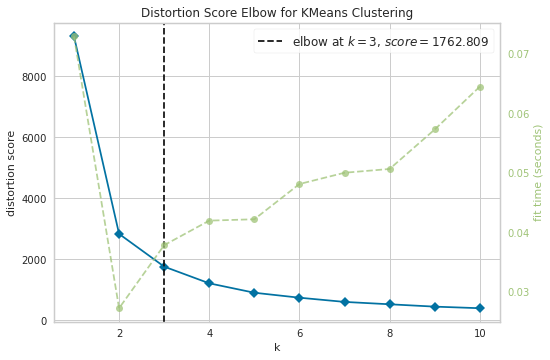

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,11))
visualizer.fit(mydata_no)
visualizer.poof()

In [96]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mydata_no)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 1, 2, 0, 0, 0, 0, 0], dtype=int32)

In [97]:
kmeans.labels_[0:10]

array([0, 1, 0, 1, 2, 0, 0, 0, 0, 0], dtype=int32)

In [98]:
# add clustering labels
merged_df.insert(0, 'Cluster Labels', kmeans.labels_)

merged_df.head()

,Cluster Labels,City,Latitude,Longitude,Year,Mean DHI,Mean DNI,Mean GHI,Mean Wind Speed,Mean Temperature
0,0,Marion,29.218245,-82.062695,2020,214.430137,71.682192,201.813242,1.933436,22.659189
1,1,Monroe,25.040513,-80.833716,2020,235.246347,71.738242,223.298059,4.608858,26.425537
2,0,Orange,28.495156,-81.311166,2020,208.115183,74.332192,201.458676,2.382523,23.169384
3,1,St. Lucie,27.390090,-80.457904,2020,229.510845,69.339155,212.451941,2.745719,24.484989
4,2,Sumter,28.668975,-82.076402,2020,224.925685,70.930822,208.430137,2.422523,23.066952


In [99]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_df['Latitude'], flor_data['Longitude'], merged_df['City'], merged_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### This cluster (red on map) on visual investigation show the least averages across the DHI, DNI and GHI data points. Classed as the 3rd best choice for citing renewable energy assets like solar and wind plants.

In [100]:
merged_df.loc[merged_df['Cluster Labels'] == 0]

,Cluster Labels,City,Latitude,Longitude,Year,Mean DHI,Mean DNI,Mean GHI,Mean Wind Speed,Mean Temperature
0,0,Marion,29.218245,-82.062695,2020,214.430137,71.682192,201.813242,1.933436,22.659189
2,0,Orange,28.495156,-81.311166,2020,208.115183,74.332192,201.458676,2.382523,23.169384
5,0,Union,30.044304,-82.395448,2020,214.449886,70.173744,199.464269,0.678973,21.386963
6,0,Alachua,29.675568,-82.364011,2020,212.837443,70.854680,199.219977,1.065000,21.819315
7,0,Calhoun,30.385373,-85.222352,2020,216.332534,67.834247,198.342922,0.667591,20.764269
8,0,Columbia,30.209523,-82.626370,2020,215.717352,69.734018,200.380137,0.580514,21.039463
9,0,Gadsden,30.593735,-84.638994,2020,218.851142,66.341438,200.102283,0.390388,20.237454
11,0,Holmes,30.891868,-85.813821,2020,216.364384,66.736872,199.237443,2.067009,20.173413
12,0,Leon,30.468306,-84.254907,2020,210.104338,69.233219,195.966781,0.237237,20.511724
13,0,Nassau,30.662433,-81.770733,2020,206.323174,70.718037,196.016324,0.679486,21.432112


### This cluster (purple on map) has on average higher mean DHI, GHI and DNI mean values across all data points. These locations provide the best locations for citing both solar and wind power generating assets.

In [101]:
merged_df.loc[merged_df['Cluster Labels'] == 1]

,Cluster Labels,City,Latitude,Longitude,Year,Mean DHI,Mean DNI,Mean GHI,Mean Wind Speed,Mean Temperature
1,1,Monroe,25.040513,-80.833716,2020,235.246347,71.738242,223.298059,4.608858,26.425537
3,1,St. Lucie,27.390090,-80.457904,2020,229.510845,69.339155,212.451941,2.745719,24.484989
10,1,Highlands,27.351319,-81.361572,2020,228.173630,71.304338,212.451027,2.301598,23.829578
17,1,Pasco,28.299618,-82.452270,2020,230.252397,70.760616,211.164498,2.874372,23.230674
21,1,Sarasota,27.336435,-82.530653,2020,236.666324,70.834932,218.345205,3.130183,24.058128
28,1,Charlotte,26.901327,-81.915680,2020,228.051484,71.989269,213.103995,2.360308,23.931084
31,1,Manatee,27.521393,-82.380157,2020,237.126598,69.989612,216.398059,3.047317,23.805970
36,1,Glades,26.932812,-81.189598,2020,235.142009,69.068037,216.700114,2.303379,24.226598
38,1,Hardee,27.485635,-81.819680,2020,233.894977,69.547146,214.078082,2.276952,23.684064
39,1,Hendry,26.597094,-81.152067,2020,230.876256,70.493607,214.372146,2.240902,24.453801


### This cluster (light green on map) shows high means across the DHI, DNI and GHI data points as well. Would be classed as 2nd best alternative for citing renewable energy assets.

In [102]:
merged_df.loc[merged_df['Cluster Labels'] == 2]

,Cluster Labels,City,Latitude,Longitude,Year,Mean DHI,Mean DNI,Mean GHI,Mean Wind Speed,Mean Temperature
4,2,Sumter,28.668975,-82.076402,2020,224.925685,70.930822,208.430137,2.422523,23.066952
15,2,Osceola,28.044384,-81.143754,2020,218.435046,72.532763,207.381393,2.360902,23.509852
16,2,Palm Beach,26.627980,-80.449417,2020,222.914041,72.026256,211.238356,2.828333,24.947500
26,2,Bay,30.248169,-85.659363,2020,220.126826,66.808105,201.025685,2.746838,21.308116
27,2,Broward,26.159807,-80.462364,2020,215.403995,74.066553,208.521804,3.496084,25.415377
29,2,Lee,26.599926,-81.882313,2020,224.264155,73.431849,212.273630,2.749361,24.303037
30,2,Madison,30.451435,-83.452452,2020,220.907648,68.089954,202.615297,1.011267,20.743664
32,2,Citrus,28.851285,-82.514121,2020,224.693151,71.645434,208.348516,2.158425,22.727340
33,2,Dixie,29.621401,-83.173510,2020,224.744178,68.332763,205.044521,2.071473,21.934521
41,2,Indian River,27.704155,-80.589442,2020,220.522146,70.919178,207.473174,2.771598,24.323505


## Next, we obtain data to address the question of optimizing energy production and reduce areas of inefficient Energy Usage.

## Data downloaded from the Florida Municipal Electric Association's website 
### https://assets.noviams.com/novi-file-uploads/fmea/Stats/2019_florida_publicpower_utility_statistical_information.xls

Data downloaded from the Florida Municipal Electric Association's website https://assets.noviams.com/novi-file-uploads/fmea/Stats/2019_florida_publicpower_utility_statistical_information.xls

In [103]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_51909f7561264ec8a8423295b186ef5e = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_51909f7561264ec8a8423295b186ef5e = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_51909f7561264ec8a8423295b186ef5e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='a8BEKMJEphbGflticyReUVfIN24eeiD8W6M6jZftRJm2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_51909f7561264ec8a8423295b186ef5e)


body = client_51909f7561264ec8a8423295b186ef5e.get_object(Bucket='ibmhackathon-donotdelete-pr-jo6rcoplooik41',Key='Florida_public power_utility_statistical_information .xlsx')['Body']

df_data_0 = pd.read_excel(body.read())
df_data_0.head()



,Utility Member,YEAR DATA,Total No: of Employees,Total No: of Customers,Gross Receipts,kWh Sales (retail),kWh Sales (wholesale),Municipal Population,Peak Demand (),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Alachua,2001.0,6.0,2872.0,6411833.0,71622573.0,0.0,6300.0,18.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bartow,2001.0,35.0,9781.0,26543636.0,271961000.0,0.0,15500.0,72.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bushnell,2001.0,7.0,1045.0,2110720.0,20520589.0,0.0,2025.0,6.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chattahoochee,2001.0,4.0,1294.0,3145576.0,44541141.0,0.0,2330.0,9.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Clewiston,2001.0,17.0,4069.0,10489376.0,128421189.0,0.0,6352.0,28.655,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
late_list = []
longi_list = []
for i in df_data_0['Utility Member']:
    address = i, 'FL'
    geolocator = Nominatim(user_agent="florida_explorer")
    location = geolocator.geocode(address)
    latitudes = location.latitude
    longitudes = location.longitude
    late_list.append(latitudes)
    longi_list.append(longitudes)

In [89]:
df_data_0.columns

Index(['Utility Member', 'YEAR DATA', 'Total No: of Employees',
       'Total No: of Customers', 'Gross Receipts', 'kWh Sales (retail)',
       'kWh Sales (wholesale)', 'Municipal Population', 'Peak Demand ()',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [195]:
df_data_0['kWh Sales (retail)']  = df_data_0['kWh Sales (retail)'].fillna(0)
df_data_0['kWh Sales (wholesale)']  = df_data_0['kWh Sales (wholesale)'].fillna(0)

In [196]:
df_data_0['kWh Sales (retail)'] = (df_data_0['kWh Sales (retail)']).astype(int)
df_data_0['kWh Sales (wholesale)'] = (df_data_0['kWh Sales (wholesale)']).astype(int)

In [197]:
utility_member = pd.DataFrame(df_data_0['Utility Member'])
years = pd.DataFrame(df_data_0['YEAR DATA'])
municipal_pop = pd.DataFrame(df_data_0['Municipal Population'])

latitude_ut = pd.DataFrame(late_list)
longitude_ut = pd.DataFrame(longi_list)
total_enrgydmnd = df_data_0['kWh Sales (retail)'] + df_data_0['kWh Sales (wholesale)']
#Here we add a new calculated column in the dataframe called energy per capita to determine energy efficiency.
energy_per_capita = ((df_data_0['kWh Sales (retail)'] + df_data_0['kWh Sales (wholesale)'])/df_data_0['Municipal Population']).round(2)
peakpwr_dmnd = df_data_0['Peak Demand ()']

utility_data = pd.concat([utility_member, years, latitude_ut, longitude_ut, total_enrgydmnd, peakpwr_dmnd, municipal_pop, energy_per_capita], axis = 1)
utility_data.columns = ['Utility Member', 'Year', 'Latitude', 'Longitude', 'Total kWh Sales', 'Peak Power Generation (MW)', 'Municipal Population','Energy Per Capita']
utility_data.head(59)

,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
0,Alachua,2001.0,29.675568,-82.364011,71622573,18.330,6300.000,11368.66
1,Bartow,2001.0,27.896379,-81.843157,271961000,72.128,15500.000,17545.87
2,Bushnell,2001.0,28.664483,-82.111740,20520589,6.400,2025.000,10133.62
3,Chattahoochee,2001.0,30.704873,-84.843223,44541141,9.785,2330.000,19116.37
4,Clewiston,2001.0,26.754231,-80.933675,128421189,28.655,6352.000,20217.44
5,Fort Meade,2001.0,27.752253,-81.801749,42415000,12.000,5693.000,7450.38
6,Fort Pierce,2001.0,27.446706,-80.325606,563409000,124.000,40000.000,14085.22
7,Gainesville,2001.0,29.651968,-82.324985,2149124620,409.000,95447.000,22516.42
8,Green Cove Springs,2001.0,29.983385,-81.674723,102969239,26.000,5184.000,19862.89
9,Havana,2001.0,30.625562,-84.415377,23278619,5.468,1816.000,12818.62


In [198]:
utility_data.corr()

,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
Year,1.000000,0.021334,-0.018420,0.113681,0.264837,0.207165,0.032294
Latitude,0.021334,1.000000,-0.673856,0.159529,0.126382,0.137787,0.022515
Longitude,-0.018420,-0.673856,1.000000,0.065834,0.046783,0.051733,-0.007940
Total kWh Sales,0.113681,0.159529,0.065834,1.000000,0.803624,0.858646,0.011546
Peak Power Generation (MW),0.264837,0.126382,0.046783,0.803624,1.000000,0.920757,0.016294
Municipal Population,0.207165,0.137787,0.051733,0.858646,0.920757,1.000000,-0.014366
Energy Per Capita,0.032294,0.022515,-0.007940,0.011546,0.016294,-0.014366,1.000000


Positive Correlation Exists Between Total kWh Sales, Peak Power Generation and Municipal Population. Weak correlation between kWh Sales and Energy
per Capita. However, all these Data Points will be used for Machine Learning Algorithm.

In [227]:
#Making copy of dataframe for future machine learning algorithms
mydata_no1 = utility_data[utility_data['Year'] == 2019]
mydata_noyryr = utility_data[utility_data['Year'] == 2019]

In [228]:
mydata_noyr = mydata_no1.drop(['Utility Member', 'Year', 'Latitude', 'Longitude'], axis = 1)

In [229]:
mydata_noyr

,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,32018991,27.800,10000.0,3201.90
1210,288644942,59.700,19500.0,14802.30
1211,24596152,5.900,3119.0,7885.91
1212,30630906,8.400,2414.0,12688.86
1213,37707638,6.100,2864.0,13166.07
1214,100404219,22.000,7985.0,12574.10
1215,42124551,10.000,6035.0,6980.04
1216,568643000,113.000,46103.0,12334.19
1217,1994459090,410.000,127955.0,15587.19
1218,103413000,24.000,7850.0,13173.63


In [230]:
#making a copy of dataframe for future Machine Learning Algorithms
mydata_nonoyr = mydata_noyr

Lets try to use the K-Means algorithm to obtain insight into the data set

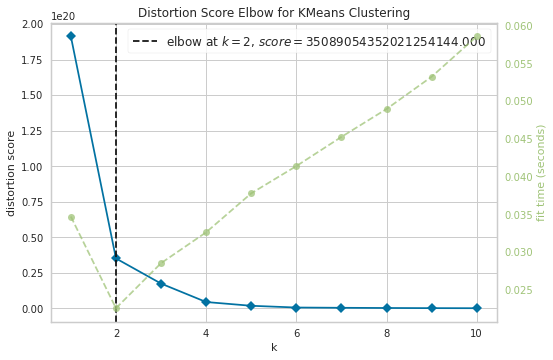

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [231]:
model1 = KMeans()
visualizer1 = KElbowVisualizer(model1, k =(1,11))
visualizer1.fit(mydata_noyr)
visualizer1.poof()

In [232]:
kclusters1 = 2

# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters1, random_state=1).fit(mydata_noyr)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [233]:
# add clustering labels
mydata_no1.insert(0, 'Cluster Labels', kmeans1.labels_)

mydata_no1.head()

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,0,Alachua,2019.0,29.675568,-82.364011,32018991,27.8,10000.0,3201.90
1210,0,Bartow,2019.0,27.896379,-81.843157,288644942,59.7,19500.0,14802.30
1211,0,Bushnell,2019.0,28.664483,-82.111740,24596152,5.9,3119.0,7885.91
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.4,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.1,2864.0,13166.07


In [234]:
mydata_no1

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,0,Alachua,2019.0,29.675568,-82.364011,32018991,27.800,10000.0,3201.90
1210,0,Bartow,2019.0,27.896379,-81.843157,288644942,59.700,19500.0,14802.30
1211,0,Bushnell,2019.0,28.664483,-82.111740,24596152,5.900,3119.0,7885.91
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.400,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.100,2864.0,13166.07
1214,0,Clewiston,2019.0,26.754231,-80.933675,100404219,22.000,7985.0,12574.10
1215,0,Fort Meade,2019.0,27.752253,-81.801749,42124551,10.000,6035.0,6980.04
1216,0,Fort Pierce,2019.0,27.446706,-80.325606,568643000,113.000,46103.0,12334.19
1217,0,Gainesville,2019.0,29.651968,-82.324985,1994459090,410.000,127955.0,15587.19
1218,0,Green Cove Springs,2019.0,29.983385,-81.674723,103413000,24.000,7850.0,13173.63


In [235]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters1)
ys = [i + x + (i*x)**2 for i in range(kclusters1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mydata_no1['Latitude'], mydata_no1['Longitude'], mydata_no1['Utility Member'], mydata_no1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [236]:
mydata_no1.loc[mydata_no1['Cluster Labels'] == 0]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,0,Alachua,2019.0,29.675568,-82.364011,32018991,27.800,10000.0,3201.90
1210,0,Bartow,2019.0,27.896379,-81.843157,288644942,59.700,19500.0,14802.30
1211,0,Bushnell,2019.0,28.664483,-82.111740,24596152,5.900,3119.0,7885.91
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.400,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.100,2864.0,13166.07
1214,0,Clewiston,2019.0,26.754231,-80.933675,100404219,22.000,7985.0,12574.10
1215,0,Fort Meade,2019.0,27.752253,-81.801749,42124551,10.000,6035.0,6980.04
1216,0,Fort Pierce,2019.0,27.446706,-80.325606,568643000,113.000,46103.0,12334.19
1217,0,Gainesville,2019.0,29.651968,-82.324985,1994459090,410.000,127955.0,15587.19
1218,0,Green Cove Springs,2019.0,29.983385,-81.674723,103413000,24.000,7850.0,13173.63


In [237]:
mydata_no1.loc[mydata_no1['Cluster Labels'] == 1]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1221,1,Jacksonville,2019.0,30.332184,-81.655651,12366494563,2644.0,1535000.0,8056.35
1233,1,Orlando,2019.0,28.542111,-81.379030,7058325000,1294.0,435500.0,16207.41


From the data clusters generated, the K-Means algorithm did not provide reasonable insight into the data

Next, we will use the K-Means algorithm to target areas of in-efficient energy production

In [238]:
mydata_no2 = utility_data[utility_data['Year'] == 2019]

In [239]:
mydata_nopwr = mydata_no2.drop(['Utility Member', 'Year', 'Latitude', 'Longitude', 'Total kWh Sales', 'Peak Power Generation (MW)'], axis = 1)

In [240]:
mydata_nopwr

,Municipal Population,Energy Per Capita
1209,10000.0,3201.90
1210,19500.0,14802.30
1211,3119.0,7885.91
1212,2414.0,12688.86
1213,2864.0,13166.07
1214,7985.0,12574.10
1215,6035.0,6980.04
1216,46103.0,12334.19
1217,127955.0,15587.19
1218,7850.0,13173.63


In [241]:
mydata_nopwr.corr()

,Municipal Population,Energy Per Capita
Municipal Population,1.000000,-0.111322
Energy Per Capita,-0.111322,1.000000


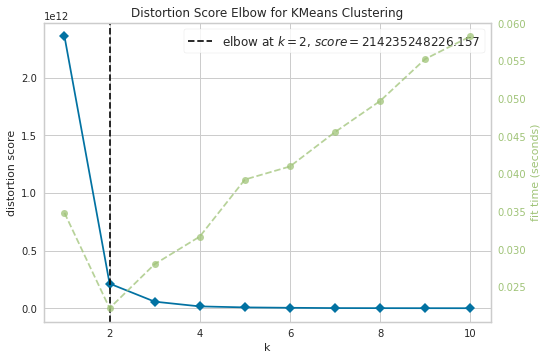

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [242]:
model2 = KMeans()
visualizer2 = KElbowVisualizer(model2, k =(1,11))
visualizer2.fit(mydata_nopwr)
visualizer2.poof()

In [243]:
kclusters2 = 2

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters2, random_state=2).fit(mydata_nopwr)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [244]:
# add clustering labels
mydata_no2.insert(0, 'Cluster Labels', kmeans2.labels_)

mydata_no2.head()

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,0,Alachua,2019.0,29.675568,-82.364011,32018991,27.8,10000.0,3201.90
1210,0,Bartow,2019.0,27.896379,-81.843157,288644942,59.7,19500.0,14802.30
1211,0,Bushnell,2019.0,28.664483,-82.111740,24596152,5.9,3119.0,7885.91
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.4,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.1,2864.0,13166.07


In [275]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters2)
ys = [i + x + (i*x)**2 for i in range(kclusters2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mydata_no2['Latitude'], mydata_no2['Longitude'], mydata_no2['Utility Member'], mydata_no2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [246]:
mydata_no2.loc[mydata_no2['Cluster Labels'] == 0]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,0,Alachua,2019.0,29.675568,-82.364011,32018991,27.800,10000.0,3201.90
1210,0,Bartow,2019.0,27.896379,-81.843157,288644942,59.700,19500.0,14802.30
1211,0,Bushnell,2019.0,28.664483,-82.111740,24596152,5.900,3119.0,7885.91
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.400,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.100,2864.0,13166.07
1214,0,Clewiston,2019.0,26.754231,-80.933675,100404219,22.000,7985.0,12574.10
1215,0,Fort Meade,2019.0,27.752253,-81.801749,42124551,10.000,6035.0,6980.04
1216,0,Fort Pierce,2019.0,27.446706,-80.325606,568643000,113.000,46103.0,12334.19
1217,0,Gainesville,2019.0,29.651968,-82.324985,1994459090,410.000,127955.0,15587.19
1218,0,Green Cove Springs,2019.0,29.983385,-81.674723,103413000,24.000,7850.0,13173.63


In [247]:
mydata_no2.loc[mydata_no2['Cluster Labels'] == 1]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1221,1,Jacksonville,2019.0,30.332184,-81.655651,12366494563,2644.0,1535000.0,8056.35


No real insight gleaned from K-means algorithm on Energy per Capita data

## A DBScan Algorithm was Used to Cluster Data Points Obtained From Florida Municipal Electric Association's website

In [248]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [253]:
X = mydata_noyryr
X1 = mydata_noyryr.drop(['Utility Member', 'Year', 'Latitude', 'Longitude'], axis = 1)

In [254]:
X1.head()

,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,32018991,27.8,10000.0,3201.90
1210,288644942,59.7,19500.0,14802.30
1211,24596152,5.9,3119.0,7885.91
1212,30630906,8.4,2414.0,12688.86
1213,37707638,6.1,2864.0,13166.07


In [255]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [256]:
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

In [257]:
clusters

array([-1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  2, -1,  2, -1, -1, -1,  0, -1,  0, -1,  1])

In [258]:
dbscan.labels_

array([-1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  2, -1,  2, -1, -1, -1,  0, -1,  0, -1,  1])

In [259]:
mydata_noyrcl = mydata_noyryr

In [260]:
mydata_noyrcl.insert(0, 'Cluster Labels', dbscan.labels_)

In [264]:
mydata_noyrcl

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,-1,Alachua,2019.0,29.675568,-82.364011,32018991,27.800,10000.0,3201.90
1210,-1,Bartow,2019.0,27.896379,-81.843157,288644942,59.700,19500.0,14802.30
1211,-1,Bushnell,2019.0,28.664483,-82.111740,24596152,5.900,3119.0,7885.91
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.400,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.100,2864.0,13166.07
1214,0,Clewiston,2019.0,26.754231,-80.933675,100404219,22.000,7985.0,12574.10
1215,-1,Fort Meade,2019.0,27.752253,-81.801749,42124551,10.000,6035.0,6980.04
1216,1,Fort Pierce,2019.0,27.446706,-80.325606,568643000,113.000,46103.0,12334.19
1217,-1,Gainesville,2019.0,29.651968,-82.324985,1994459090,410.000,127955.0,15587.19
1218,0,Green Cove Springs,2019.0,29.983385,-81.674723,103413000,24.000,7850.0,13173.63


In [276]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mydata_noyrcl['Latitude'], mydata_noyrcl['Longitude'], mydata_noyrcl['Utility Member'], mydata_noyrcl['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### This cluster has the largest Energy per Capita in comparison to the rest of the clusters. They also have on average larger Municipal Populations. These areas show adequate energy statistics when compared to the other clusters. 

In [269]:
mydata_noyrcl.loc[mydata_noyrcl['Cluster Labels'] == -1]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1209,-1,Alachua,2019.0,29.675568,-82.364011,32018991,27.80,10000.0,3201.90
1210,-1,Bartow,2019.0,27.896379,-81.843157,288644942,59.70,19500.0,14802.30
1211,-1,Bushnell,2019.0,28.664483,-82.111740,24596152,5.90,3119.0,7885.91
1215,-1,Fort Meade,2019.0,27.752253,-81.801749,42124551,10.00,6035.0,6980.04
1217,-1,Gainesville,2019.0,29.651968,-82.324985,1994459090,410.00,127955.0,15587.19
1220,-1,Homestead,2019.0,25.471895,-80.475990,555480956,115.00,76236.0,7286.33
1221,-1,Jacksonville,2019.0,30.332184,-81.655651,12366494563,2644.00,1535000.0,8056.35
1222,-1,Jacksonville Beach,2019.0,30.294686,-81.393140,716646220,168.00,23628.0,30330.38
1223,-1,Key West,2019.0,24.562557,-81.772437,744331106,145.20,25755.0,28900.45
1224,-1,Kissimmee,2019.0,28.291899,-81.407584,1620434000,374.00,72717.0,22284.12


### This cluster has higher than normal Energy per Capita for its population size, indicating inefficient energy usage within this region.

In [270]:
mydata_noyrcl.loc[mydata_noyrcl['Cluster Labels'] == 0]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1212,0,Blountstown,2019.0,30.443529,-85.045195,30630906,8.400,2414.0,12688.86
1213,0,Chattahoochee,2019.0,30.704873,-84.843223,37707638,6.100,2864.0,13166.07
1214,0,Clewiston,2019.0,26.754231,-80.933675,100404219,22.000,7985.0,12574.10
1218,0,Green Cove Springs,2019.0,29.983385,-81.674723,103413000,24.000,7850.0,13173.63
1219,0,Havana,2019.0,30.625562,-84.415377,23918997,6.900,1754.0,13636.83
1235,0,Starke,2019.0,29.944355,-82.110111,69110586,15.628,5449.0,12683.17
1237,0,Wauchula,2019.0,27.547259,-81.811471,63252654,14.071,5001.0,12648.00


### These areas have the largest kWh Sales in comparison to the rest of the clusters. Given its population size, This could indicate an overproduction of energy. 

In [271]:
mydata_noyrcl.loc[mydata_noyrcl['Cluster Labels'] == 1]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1216,1,Fort Pierce,2019.0,27.446706,-80.325606,568643000,113.0,46103.0,12334.19
1225,1,Lake Worth,2019.0,26.615891,-80.069143,473067015,96.4,37000.0,12785.60
1239,1,Winter Park,2019.0,28.597771,-81.351026,420400000,94.1,32391.0,12978.91


### This cluster has lower than average Energy per capita and moderate population sizes. No determination on the relevance of this cluser made.

In [272]:
mydata_noyrcl.loc[mydata_noyrcl['Cluster Labels'] == 2]

,Cluster Labels,Utility Member,Year,Latitude,Longitude,Total kWh Sales,Peak Power Generation (MW),Municipal Population,Energy Per Capita
1229,2,Mount Dora,2019.0,28.818747,-81.645857,91242633,23.0,14928.0,6112.18
1231,2,Newberry,2019.0,29.646354,-82.606502,37549216,9.0,6873.0,5463.29
